In [1]:
import pandas as pd

In [3]:
df1 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")

In [9]:
#juntando os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [10]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [11]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [25]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
87,Recife,2019-01-01,210.06,983,4
14,Fortaleza,2019-01-12,132.68,1005,1
19,Natal,2019-03-31,282.00,854,2
101,Aracaju,2018-01-01,16.62,1520,9
79,Natal,2019-02-28,557.00,852,4


In [26]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [28]:
#alterando tipo de dados da coluna lojaId
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [31]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [32]:
#criando a coluna receitas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [33]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [36]:
df["Receita"].max()

3544.0

In [37]:
df["Receita"].min()

3.34

In [38]:
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [40]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [44]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [46]:
df.sort_values("Receita", ascending=False).tail(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
216,Salvador,2019-01-02,5.82,1035,1,5.82
216,Natal,2019-01-02,5.82,1035,1,5.82
161,Salvador,2019-01-02,5.80,1036,1,5.80
161,Natal,2019-01-02,5.80,1036,1,5.80
95,Salvador,2019-01-01,5.13,1035,1,5.13
95,Natal,2019-01-02,5.13,1035,1,5.13
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
65,Recife,2019-01-01,4.01,981,1,4.01
118,Aracaju,2018-01-01,3.34,1522,1,3.34


**TRABALHANDO COM DATAS**

In [47]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [48]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [49]:
df["Data"] = pd.to_datetime(df["Data"])

In [50]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [51]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [52]:
df["Ano_Venda"] = df["Data"].dt.year

In [55]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
69,Fortaleza,2019-01-01,216.65,1003,6,1299.90,2019
168,Salvador,2019-01-02,20.22,1036,1,20.22,2019
6,Natal,2018-07-02,322.00,852,4,1288.00,2018
55,Salvador,2019-01-01,36.62,1036,1,36.62,2019
23,Salvador,2019-01-01,193.20,1036,3,579.60,2019


In [56]:
#extraindo o mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [58]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
218,Natal,2019-01-02,189.12,1036,3,567.36,2019,1,2
122,Salvador,2019-03-02,13.27,1037,1,13.27,2019,3,2
80,Aracaju,2018-01-01,121.77,1523,3,365.31,2018,1,1
196,Natal,2019-01-02,145.09,1036,2,290.18,2019,1,2
54,Fortaleza,2019-01-01,16.73,1002,5,83.65,2019,1,1


In [59]:
#retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [60]:
#Calculando a diferença de dias
df["dif_dias"] = df["Data"] - df["Data"].min()

In [64]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,dif_dias
164,Salvador,2019-01-02,6.59,1035,1,6.59,2019,1,2,366 days
81,Fortaleza,2019-01-01,10.68,1005,1,10.68,2019,1,1,365 days
41,Recife,2019-02-13,157.78,981,4,631.12,2019,2,13,408 days
115,Aracaju,2018-01-01,50.99,1522,10,509.90,2018,1,1,0 days
36,Salvador,2019-01-01,9.67,1037,1,9.67,2019,1,1,365 days


In [65]:
#criando a coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [79]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,dif_dias,trimestre_venda
47,Salvador,2019-01-01,190.03,1036,2,380.06,2019,1,1,365 days,1
211,Salvador,2019-01-02,141.05,1035,3,423.15,2019,1,2,366 days,1
105,Fortaleza,2019-01-01,174.66,1004,1,174.66,2019,1,1,365 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1
170,Salvador,2019-01-02,9.26,1035,3,27.78,2019,1,2,366 days,1


In [80]:
#filtrando as vendas de março de 2019
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [84]:
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,dif_dias,trimestre_venda
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
8,Natal,2019-03-27,667.00,852,4,2668.00,2019,3,27,450 days,1
122,Salvador,2019-03-02,13.27,1037,1,13.27,2019,3,2,425 days,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,2019,3,2,425 days,1
132,Recife,2019-03-02,17.49,983,5,87.45,2019,3,2,425 days,1
2,Natal,2019-03-11,308.00,852,3,924.00,2019,3,11,434 days,1
125,Fortaleza,2019-03-02,37.60,983,4,150.40,2019,3,2,425 days,1
128,Salvador,2019-03-02,36.84,1034,1,36.84,2019,3,2,425 days,1
136,Recife,2019-03-02,39.09,982,4,156.36,2019,3,2,425 days,1
46,Natal,2019-03-26,753.00,853,2,1506.00,2019,3,26,449 days,1


**VISUALIZAÇÃO DE DADOS**

In [86]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

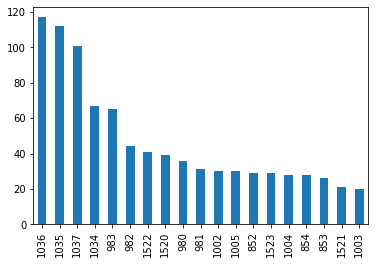

In [91]:
#gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar();

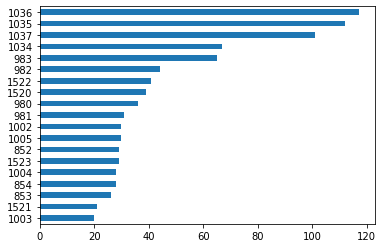

In [90]:
#barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

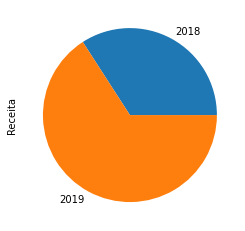

In [92]:
#gráfico de pizza por ano
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [93]:
#total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

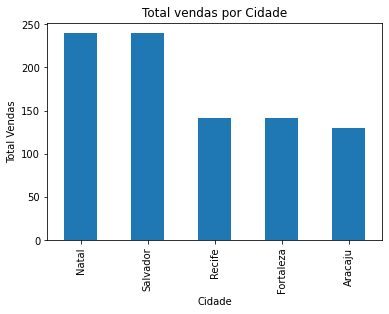

In [94]:
#adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

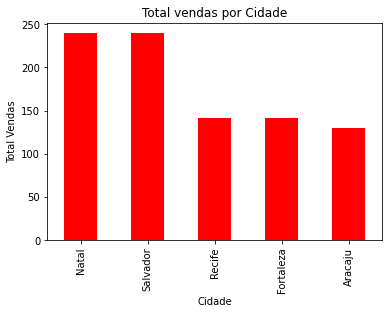

In [95]:
#alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [96]:
#alterando o estilo
plt.style.use("ggplot")

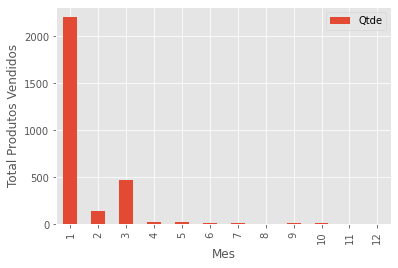

In [99]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot.bar()
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [100]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [101]:
#selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

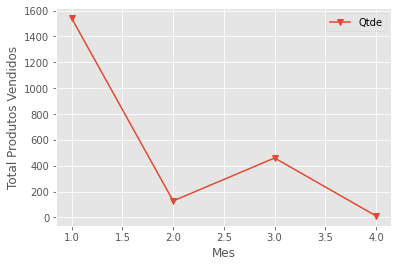

In [103]:
#Total produtos vendidos por mes
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

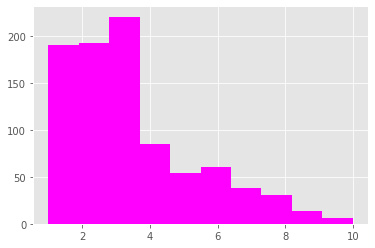

In [105]:
#Histograma
plt.hist(df["Qtde"], color="magenta");

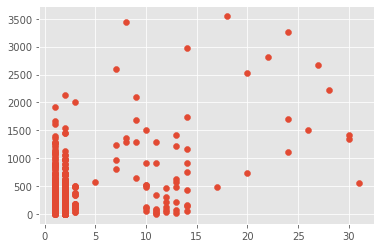

In [106]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

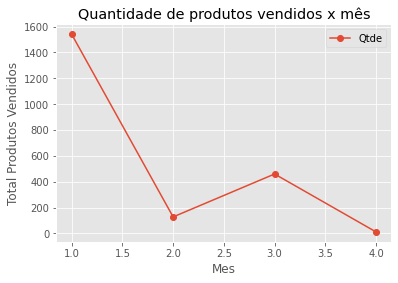

In [107]:
#salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("Gráfico QTDE x MES.png")